In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
import yfinance as yf
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)

# Altcoin symbols
symbols = ['ETH-USD', 'BNB-USD', 'SOL-USD', 'ADA-USD', 'XRP-USD']

# Download daily closing prices
altcoins_data = yf.download(symbols, start=start, end=end)['Close']

# Save to CSV
altcoins_data.to_csv("altcoins_comparison_data.csv")


C:\Users\weare\AppData\Local\Temp\ipykernel_8896\794949569.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  altcoins_data = yf.download(symbols, start=start, end=end)['Close']
[*********************100%***********************]  1 of 5 completed

5 Failed downloads:
['SOL-USD']: Timeout('Failed to perform, curl: (28) Operation timed out after 10006 milliseconds with 55651 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['BNB-USD']: Timeout('Failed to perform, curl: (28) Operation timed out after 10006 milliseconds with 27063 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['ADA-USD']: Timeout('Failed to perform, curl: (28) Operation timed out after 10006 milliseconds with 50955 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['ETH-USD']: Timeout('Failed to perform, curl: (28) Operation timed out after 10005 milliseconds

[*********************************************200%***********************************************]  2 of 1 completed

In [3]:
import yfinance as yf
from datetime import datetime

# Set date range: last 15 years from today
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)

stock = 'BTC-USD'

# Try downloading with increased timeout and retries
for attempt in range(3):
    try:
        stock_data = yf.download(
            stock,
            start=start,
            end=end,
            auto_adjust=False,  # Optional: match expected behavior
            progress=True,
            threads=False,
            timeout=30  # increase timeout
        )
        if not stock_data.empty:
            print("✅ Download successful.")
            stock_data.to_csv("stock_data.csv")
            break
    except Exception as e:
        print(f"❌ Attempt {attempt + 1} failed: {e}")
else:
    print("❌ All attempts failed. Try again later or use a local CSV.")


[*********************100%***********************]  1 of 1 completed**************************************************500%***********************************************************************************************************************]  5 of 1 completed

✅ Download successful.


In [5]:
# 5 another big cap cryptocurrency
altcoins_data.head()

Ticker,ADA-USD,BNB-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,,


In [6]:
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2025-08-02,112526.914062,112526.914062,114021.601562,112005.765625,113320.390625,56870866000
2025-08-03,114217.671875,114217.671875,114747.421875,111943.804688,112525.804688,48099615826
2025-08-04,115071.882812,115071.882812,115729.468750,114130.406250,114223.921875,35783028986
2025-08-05,114141.445312,114141.445312,115117.437500,112701.109375,115072.187500,61039182286
2025-08-08,116849.023438,116849.023438,117626.726562,116730.203125,117519.648438,66397515776


In [7]:
altcoins_data.tail()

Ticker,ADA-USD,BNB-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,,
2025-07-30,0.763439,793.144836,3808.201660,177.694016,3.098376
2025-07-31,0.740060,783.666809,3696.707764,172.424347,3.025170
2025-08-01,0.715667,757.186584,3488.365967,162.877090,2.964597
2025-08-02,0.697670,736.646423,3392.741211,158.483017,2.766372
2025-08-05,0.753323,765.962402,3677.073975,169.194229,3.058656


In [7]:
"""summary statistics count: total number of non-null entries mean: average

std: standard deviation

min and max: smallest and largest values

25%, 50%, 75%: percentiles"""
stock_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3.977000e+03
mean,23955.763310,23955.763310,24432.947582,23402.128515,23928.484825,2.017386e+10
std,28262.765869,28262.765869,28757.304667,27686.592286,28230.707960,2.152486e+10
min,178.102997,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2357.899902,2357.899902,2448.389893,2275.139893,2332.770020,9.641120e+08
50%,10166.400391,10166.400391,10353.927734,9831.462891,10160.737305,1.626871e+10
75%,38144.308594,38144.308594,39394.437500,37201.816406,38138.386719,3.159949e+10
max,119995.414062,119995.414062,123091.609375,118959.195312,119997.445312,3.509679e+11


In [8]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Adj Close,BTC-USD,3977.0,2.395576e+04,2.826277e+04,1.781030e+02,2.357900e+03,1.016640e+04,3.814431e+04,1.199954e+05
Close,BTC-USD,3977.0,2.395576e+04,2.826277e+04,1.781030e+02,2.357900e+03,1.016640e+04,3.814431e+04,1.199954e+05
High,BTC-USD,3977.0,2.443295e+04,2.875730e+04,2.117310e+02,2.448390e+03,1.035393e+04,3.939444e+04,1.230916e+05
Low,BTC-USD,3977.0,2.340213e+04,2.768659e+04,1.715100e+02,2.275140e+03,9.831463e+03,3.720182e+04,1.189592e+05
Open,BTC-USD,3977.0,2.392848e+04,2.823071e+04,1.768970e+02,2.332770e+03,1.016074e+04,3.813839e+04,1.199974e+05
Volume,BTC-USD,3977.0,2.017386e+10,2.152486e+10,5.914570e+06,9.641120e+08,1.626871e+10,3.159949e+10,3.509679e+11


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3977 entries, 2014-09-17 to 2025-08-08
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  3977 non-null   float64
 1   (Close, BTC-USD)      3977 non-null   float64
 2   (High, BTC-USD)       3977 non-null   float64
 3   (Low, BTC-USD)        3977 non-null   float64
 4   (Open, BTC-USD)       3977 non-null   float64
 5   (Volume, BTC-USD)     3977 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 217.5 KB


In [10]:
## we dont have any nan values

In [10]:
stock_data.columns

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [11]:
# close prise data 
price_closing = stock_data[['Close']]

In [12]:
price_closing

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-08-02,112526.914062
2025-08-03,114217.671875


#### Does Bitcoin dominance influence the price movement of major altcoins in the cryptocurrency market?

C:\Users\weare\AppData\Local\Temp\ipykernel_8896\824888282.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False, threads=False, timeout=30)

1 Failed download:
['BTC-USD']: HTTPError('Failed to perform, curl: (16) . See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
C:\Users\weare\AppData\Local\Temp\ipykernel_8896\824888282.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False, threads=False, timeout=30)
C:\Users\weare\AppData\Local\Temp\ipykernel_8896\824888282.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False, threads=False, timeout=30)
C:\Users\weare\AppData\Local\Temp\ipykernel_8896\824888282.py:16: FutureWarning: YF.download() has changed argument auto_adjust defaul

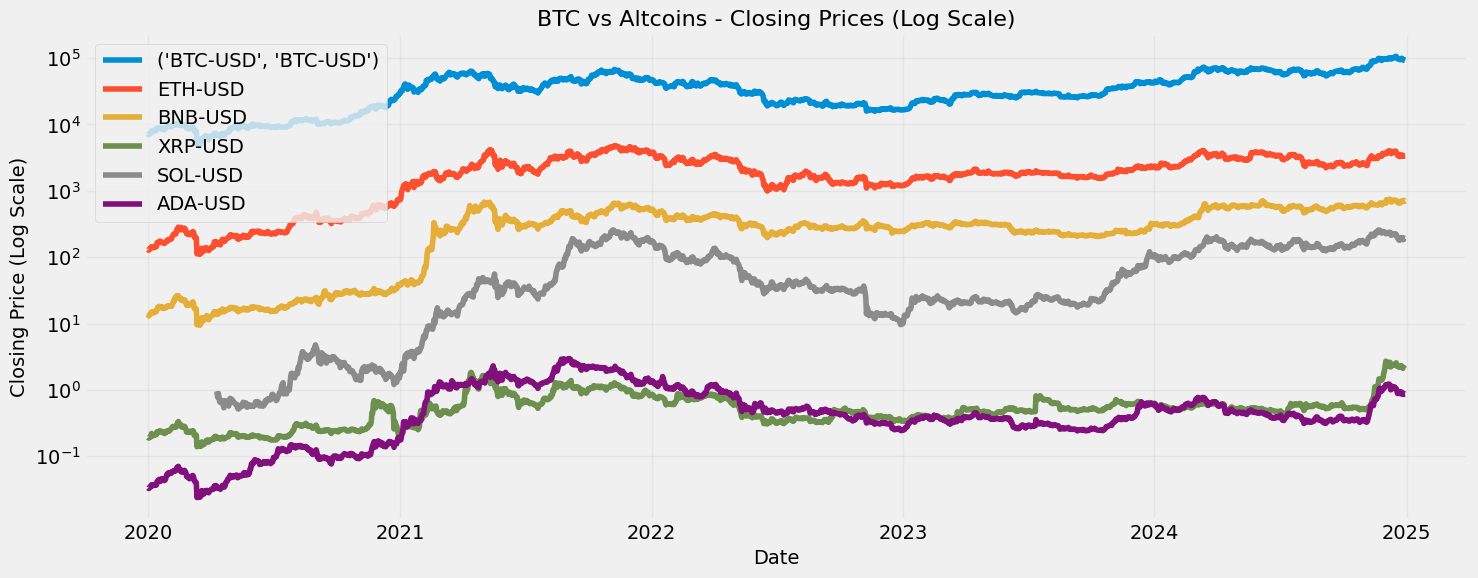

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import time

# Settings
start = "2020-01-01"
end = "2024-12-31"
btc_ticker = "BTC-USD"
altcoins = ["ETH-USD", "BNB-USD", "XRP-USD", "SOL-USD", "ADA-USD"]

# Function with retry and longer timeout
def download_with_retry(ticker, start, end, retries=5, wait=5):
    for i in range(retries):
        try:
            data = yf.download(ticker, start=start, end=end, progress=False, threads=False, timeout=30)
            if not data.empty:
                return data
        except Exception as e:
            print(f"Attempt {i+1} for {ticker} failed: {e}")
            time.sleep(wait)
    print(f"❌ Failed to download {ticker} after {retries} retries.")
    return pd.DataFrame()

# Download BTC
btc_data = download_with_retry(btc_ticker, start, end)[['Close']]
btc_data.rename(columns={"Close": "BTC-USD"}, inplace=True)

# Download Altcoins one by one
altcoins_data = pd.DataFrame()
for coin in altcoins:
    coin_data = download_with_retry(coin, start, end)[['Close']]
    if not coin_data.empty:
        altcoins_data[coin] = coin_data['Close']

# Combine BTC + Altcoins
combined_data = pd.concat([btc_data, altcoins_data], axis=1)

# Drop rows where all prices are missing
combined_data.dropna(how="all", inplace=True)

# Plot
plt.figure(figsize=(15, 6))
for coin in combined_data.columns:
    plt.plot(combined_data.index, combined_data[coin], label=coin)

plt.yscale("log")
plt.title("BTC vs Altcoins - Closing Prices (Log Scale)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price (Log Scale)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


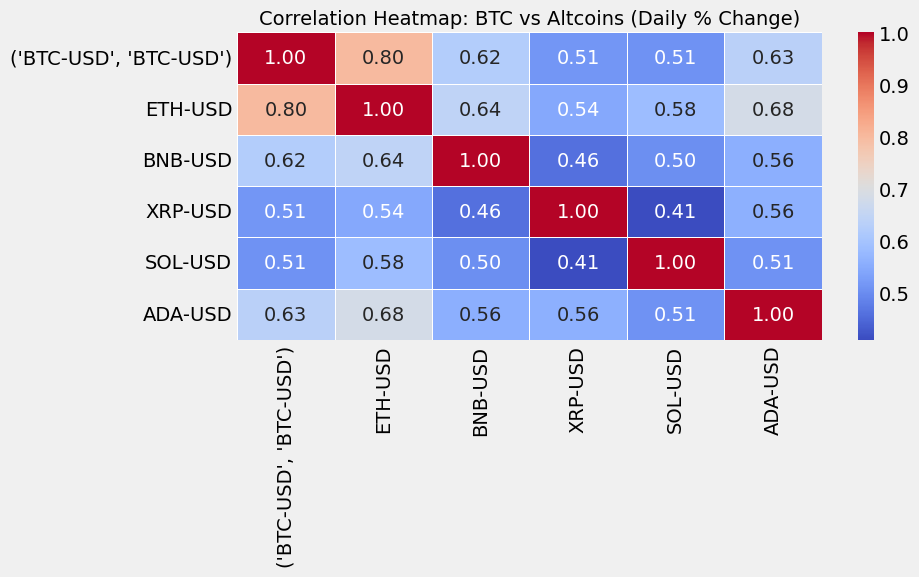

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix after dropping NaNs
correlation_matrix = combined_data.pct_change().dropna().corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: BTC vs Altcoins (Daily % Change)", fontsize=14)
plt.tight_layout()
plt.show()


#### 📌 Conclusion:
##### Does Bitcoin dominance influence the price movement of major altcoins in the cryptocurrency market?

✅ Influence of Bitcoin on Altcoins :
Bitcoin Dominance: The analysis supports the hypothesis that Bitcoin (BTC) plays a dominant role in influencing the price movements of major altcoins in the crypto market.

High Correlation with ETH: The strongest correlation is observed between BTC and ETH (0.80), indicating that Ethereum closely follows Bitcoin's price trends.

Moderate Influence on Other Altcoins: BTC shows moderate correlation with BNB (0.62), SOL (0.51), ADA (0.63), and XRP (0.51). While not as strong as BTC–ETH, these correlations still suggest partial dependence on BTC's movement.

Log-Scale Trends: The log-scale price chart shows that most altcoins mimic BTC's overall growth trajectory, especially during major market rallies or crashes, supporting the idea of market-wide sentiment being led by BTC.

##### 🔍 Insight:
These findings confirm that BTC remains the primary market mover. Even when altcoins have unique ecosystems, technological use cases, or community dynamics, their short-term price behavior is still heavily influenced by Bitcoin.

In [16]:
#after finding ans now move to our main project goal


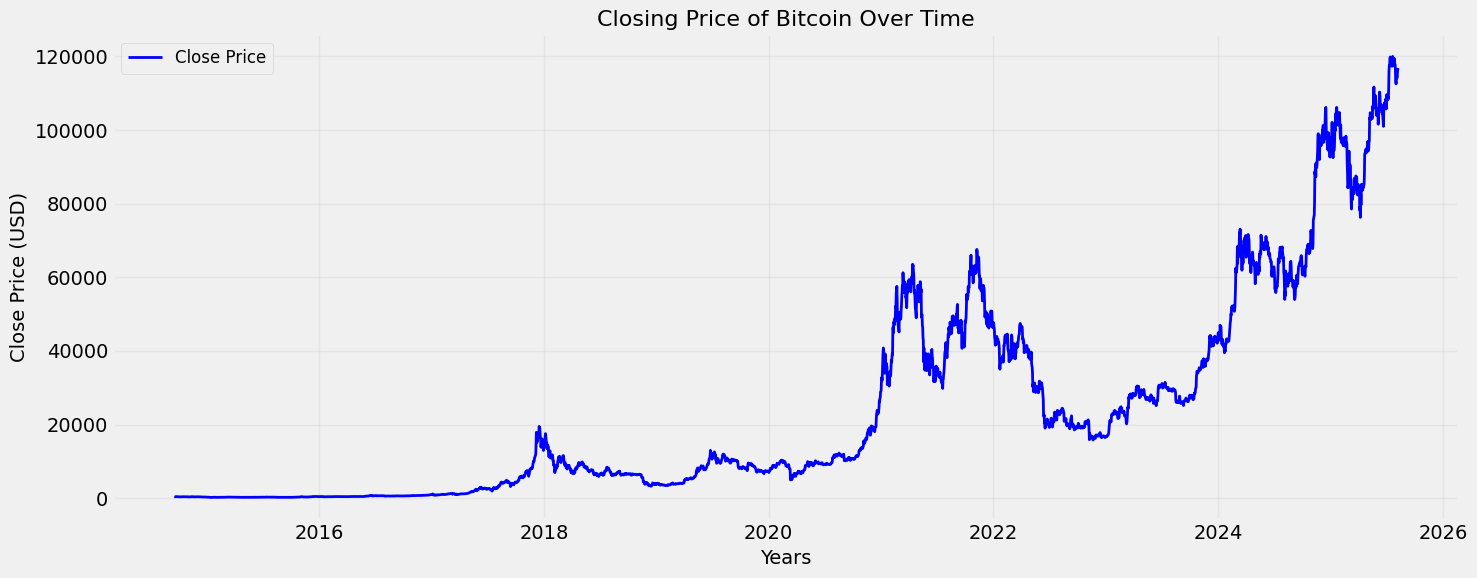

In [15]:
import matplotlib.pyplot as plt

# Plot closing price of Bitcoin with enhancements
plt.figure(figsize=(15, 6))
plt.plot(price_closing.index, price_closing['Close'], label='Close Price', color='blue', linewidth=2)

# Titles and labels
plt.title("Closing Price of Bitcoin Over Time", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)

# Grid, legend, and style
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
#Moving average
for i in range(2014, 2025):
    print(i , list(stock_data.index.year).count(i))



2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [17]:
price_closing['MA_365'] = price_closing['Close'].rolling(window = 365).mean()
price_closing['MA_100'] = price_closing['Close'].rolling(window = 100).mean()


C:\Users\weare\AppData\Local\Temp\ipykernel_8896\1224143892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_closing['MA_365'] = price_closing['Close'].rolling(window = 365).mean()
C:\Users\weare\AppData\Local\Temp\ipykernel_8896\1224143892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_closing['MA_100'] = price_closing['Close'].rolling(window = 100).mean()


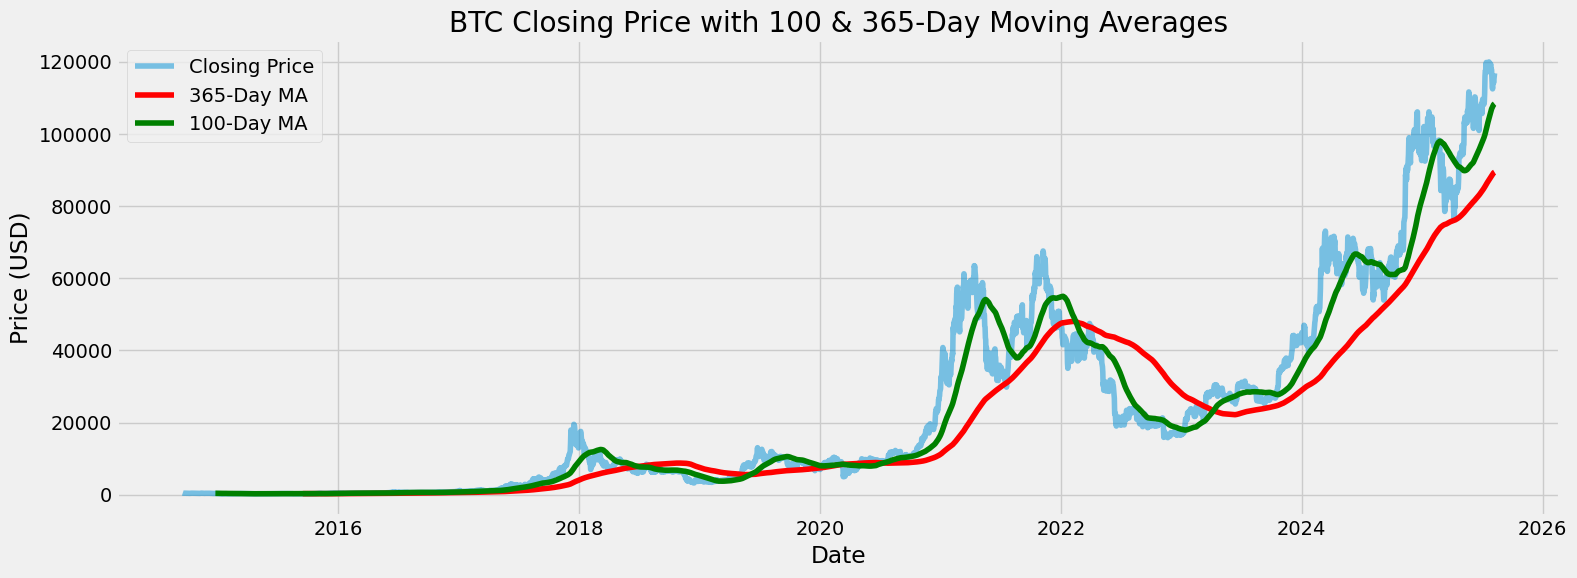

In [18]:
plt.figure(figsize=(16, 6))
plt.plot(price_closing.index, price_closing['Close'], label='Closing Price', alpha=0.5)
plt.plot(price_closing.index, price_closing['MA_365'], label='365-Day MA', color='r')
plt.plot(price_closing.index, price_closing['MA_100'], label='100-Day MA', color='green')
plt.title('BTC Closing Price with 100 & 365-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# now we are going to apply forcasting models
# Deep learning Lstm--> Long short term Memomry
# statistic model --> Arima
# facebook model --> prophet


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from datetime import datetime, timedelta


c:\Users\weare\ansel\envs\crypto_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
import pandas as pd

# Load the CSV skipping the first two header rows
df = pd.read_csv("btc_data.csv", skiprows=2)

# Rename columns
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)
# Save cleaned data to new CSV
df.to_csv("clean_stock_data.csv")

# Check result
print(df.head())



             Adj Close       Close        High         Low        Open  \
Date                                                                     
2014-09-19  394.795990  394.795990  427.834991  384.532013  424.102997   
2014-09-20  408.903992  408.903992  423.295990  389.882996  394.673004   
2014-09-21  398.821014  398.821014  412.425995  393.181000  408.084991   
2014-09-22  402.152008  402.152008  406.915985  397.130005  399.100006   
2014-09-23  435.790985  435.790985  441.557007  396.196991  402.092010   

              Volume  
Date                  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  
2014-09-22  24127600  
2014-09-23  45099500  


c:\Users\weare\ansel\envs\crypto_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\weare\ansel\envs\crypto_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\weare\ansel\envs\crypto_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


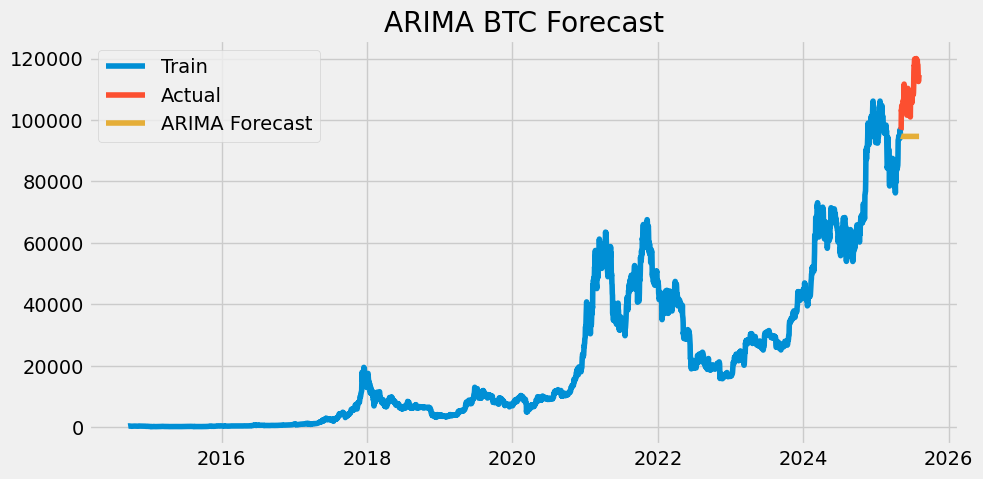

RMSE: 15634.40
MAE: 14515.04


In [21]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

#use Close price for ARIMA
btc= df[['Close']]

# Split data into train and test sets
train = btc[:-90]
test = btc[-90:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust order of pdq as needed
arima_result = model.fit()

# Forecast
arima_forecast = arima_result.forecast(steps=90)
arima_forecast.index = test.index

# Plot
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA BTC Forecast")
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test, arima_forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, arima_forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


### 🔍 Short Observation – ARIMA Forecast Evaluation
* RMSE: 15,634 → High error, sensitive to large BTC price swings.

* MAE: 14,515 → Average prediction error, shows consistent deviation.

#### 📌 Insight:
ARIMA shows moderate accuracy on BTC price forecasting, with notable error margins, likely due to high volatility in crypto markets. Use as a baseline model for comparison with Prophet or LSTM.


#### 📘 Understanding: Train Days vs Forecast Days
#### ✅ Key Concepts:
Train Days: Number of past days used to train the model.

Forecast Days: Number of future days to predict using the trained model.

##### 🎯 When to Use:
| Scenario            | Train Days             | Forecast Days        |
| ------------------- | ---------------------- | -------------------- |
| 🔮 Real Forecasting | Entire data till today | e.g., 30 days future |
| 📊 Model Evaluation | e.g., 365 days         | e.g., last 90 days   |




#### 🧠 Best Practices:
Use forecast days to define the prediction horizon (7, 30, 90...).

###### Real forecasting (use full data to predict next 30 days)
train = btc.copy()
forecast_days = 30

###### Evaluation mode (simulate prediction)
train = btc[-(365+90):-90]
test = btc[-90:]



## Prophet Model forcasting

###### little problem in Yfinace load data.csv that reason need small cleaning of dataset 


In [22]:
import pandas as pd

# Load the CSV
df = pd.read_csv("btc_data.csv")

# Rename columns
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime with errors handled
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where the date conversion failed (invalid dates)
df = df.dropna(subset=['Date'])

# Set Date as index
df.set_index('Date', inplace=True)




In [23]:
from prophet import Prophet

# Reset index and rename for Prophet
btc_prophet = df[['Close']].reset_index()
btc_prophet.columns = ['ds', 'y']


09:55:42 - cmdstanpy - INFO - Chain [1] start processing
09:55:45 - cmdstanpy - INFO - Chain [1] done processing


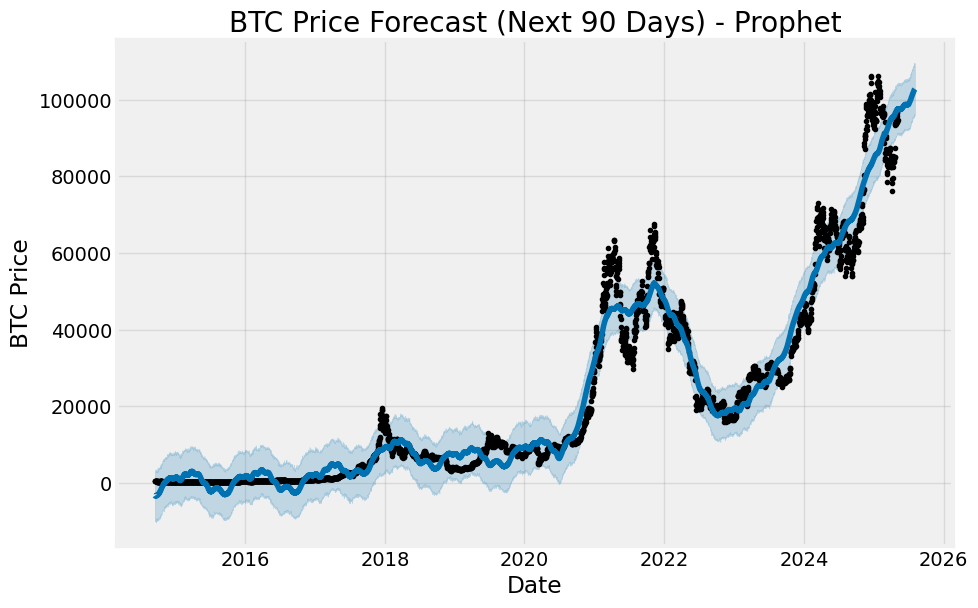

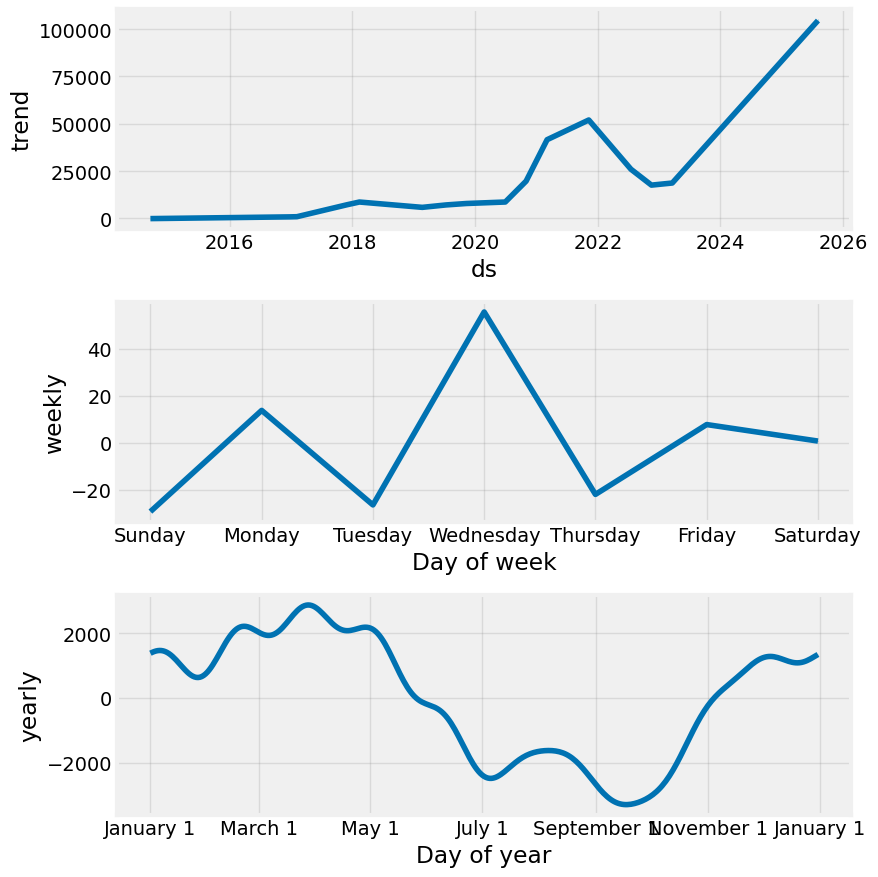

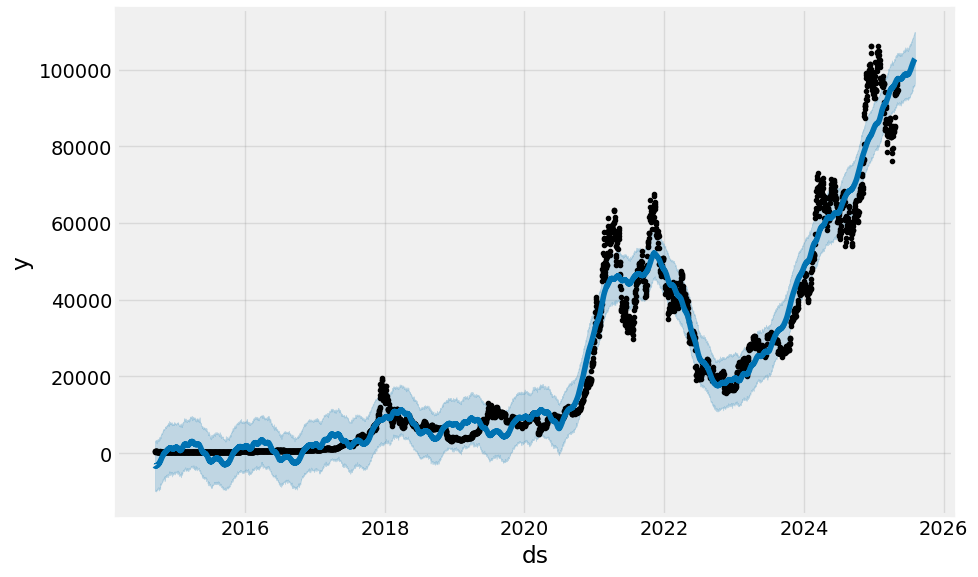

In [24]:
train = btc_prophet[:-90]
test = btc_prophet[-90:]
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Create future dataframe
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("BTC Price Forecast (Next 90 Days) - Prophet")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.grid(True)
plt.show()

model.plot_components(forecast)
plt.tight_layout()
plt.show()
# Forecast for 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)



In [25]:
# Extract only forecasted part
forecast_90 = forecast.tail(90)

# Align forecast with test data
test = test.reset_index(drop=True)
forecast_90 = forecast_90.reset_index(drop=True)

# Now compute metrics
mse = mean_squared_error(test['y'], forecast_90['yhat'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['y'], forecast_90['yhat'])

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 11062.15
MAE: 10075.08


###### ✅ Model Evaluation (Prophet Scores)
* RMSE: 11,062.15
→ On average,predicted BTC prices deviate by around $11,062 from actual values, with more sensitivity to large errors.

* MAE: 10,075.08
→ The average absolute difference between predicted and actual BTC prices is $10,075, regardless of direction (over or under).

* 📉 Interpretation: Prophet has performed better than earlier ARIMA model (RMSE ~15,634, MAE ~14,515), indicating improved prediction accuracy.

#### 📈 Plot Interpretation
* Forecast Plot (First Image):

* Blue line: Predicted BTC prices (yhat).

* Shaded region: Uncertainty interval.

* Shows an upward trend into the future with widening uncertainty.

* Trend + Seasonality Plots (Second Image):

* Trend (top): Long-term BTC price increase.

* Weekly seasonality (middle): Peaks on Wednesdays, dips on Tuesdays & Sundays.

* Yearly seasonality (bottom): BTC tends to peak around March–April, and dip during July–September.

## Now forcasting Lstm Model

In [26]:
import pandas as pd

# Load the CSV
df = pd.read_csv("btc_data.csv")

# Rename columns
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime with errors handled
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where the date conversion failed (invalid dates)
df = df.dropna(subset=['Date'])

# Set Date as index
df.set_index('Date', inplace=True)



In [27]:
##scalling data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit and transform the data
scaled_data = scaler.fit_transform(price_closing[['Close']])

###### MinMax scaling transforms features to a fixed range—usually 0 to 1—so that all variables contribute equally to a model. It helps improve accuracy and speed, especially for algorithms sensitive to feature scale

In [28]:
scaled_data

array([[0.00233047],
       [0.00205594],
       [0.00180853],
       ...,
       [0.95890801],
       [0.95114255],
       [0.9737401 ]])

In [29]:
import keras.models
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [30]:
#prepare data for lstm
x_data = []
y_data = []
base_days=90
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [31]:
#split into train and test 
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]


In [32]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Users\weare\ansel\envs\crypto_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

| Layer       | Details                                                                            |
| ----------- | ---------------------------------------------------------------------------------- |
| `LSTM(128)` | First LSTM layer with 128 units and `return_sequences=True` to feed into next LSTM |
| `LSTM(64)`  | Second LSTM with 64 units, outputs last time step                                  |
| `Dense(25)` | Fully connected layer with 25 neurons (intermediate)                               |
| `Dense(1)`  | Final output neuron – for predicting the next time step value                      |


In [33]:
model.fit(x_train, y_train, batch_size=64, epochs=25)

Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - loss: 0.0020
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.4873e-04
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.2743e-04
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.1215e-04
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.1784e-04
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.1016e-04
Epoch 7/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 1.7122e-04
Epoch 8/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 1.7077e-04
Epoch 9/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 1.5098e-04
Epoch 10/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 1.4769e-04
Epoch 11/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 1.6733e-04
Epoch 12/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 1.4022e-04
Epoch 13/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 1.4412e-04
Epoch 14/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 1.3433e-04
Epoch

In [34]:
predictions = model.predict(x_test)
inv_predictions=scaler.inverse_transform(predictions)
inv_y_test=scaler.inverse_transform(y_test.reshape(-1, 1))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


In [35]:
inv_predictions

array([[ 59252.734],
       [ 60328.355],
       [ 62638.008],
       [ 64691.668],
       [ 65576.13 ],
       [ 65608.37 ],
       [ 66219.06 ],
       [ 66935.13 ],
       [ 67783.75 ],
       [ 68163.87 ],
       [ 67625.62 ],
       [ 66720.97 ],
       [ 66129.266],
       [ 66641.31 ],
       [ 67383.29 ],
       [ 68165.086],
       [ 68189.586],
       [ 67707.37 ],
       [ 66617.4  ],
       [ 65941.65 ],
       [ 64233.45 ],
       [ 62508.445],
       [ 60477.11 ],
       [ 57627.25 ],
       [ 56200.926],
       [ 55473.195],
       [ 57655.875],
       [ 59983.473],
       [ 61678.14 ],
       [ 61752.836],
       [ 61353.523],
       [ 61261.74 ],
       [ 60592.32 ],
       [ 59495.023],
       [ 59053.375],
       [ 59202.582],
       [ 59197.156],
       [ 59517.207],
       [ 59690.605],
       [ 60523.35 ],
       [ 61038.074],
       [ 62581.125],
       [ 63996.453],
       [ 64930.676],
       [ 64807.855],
       [ 63084.375],
       [ 61151.17 ],
       [ 5989

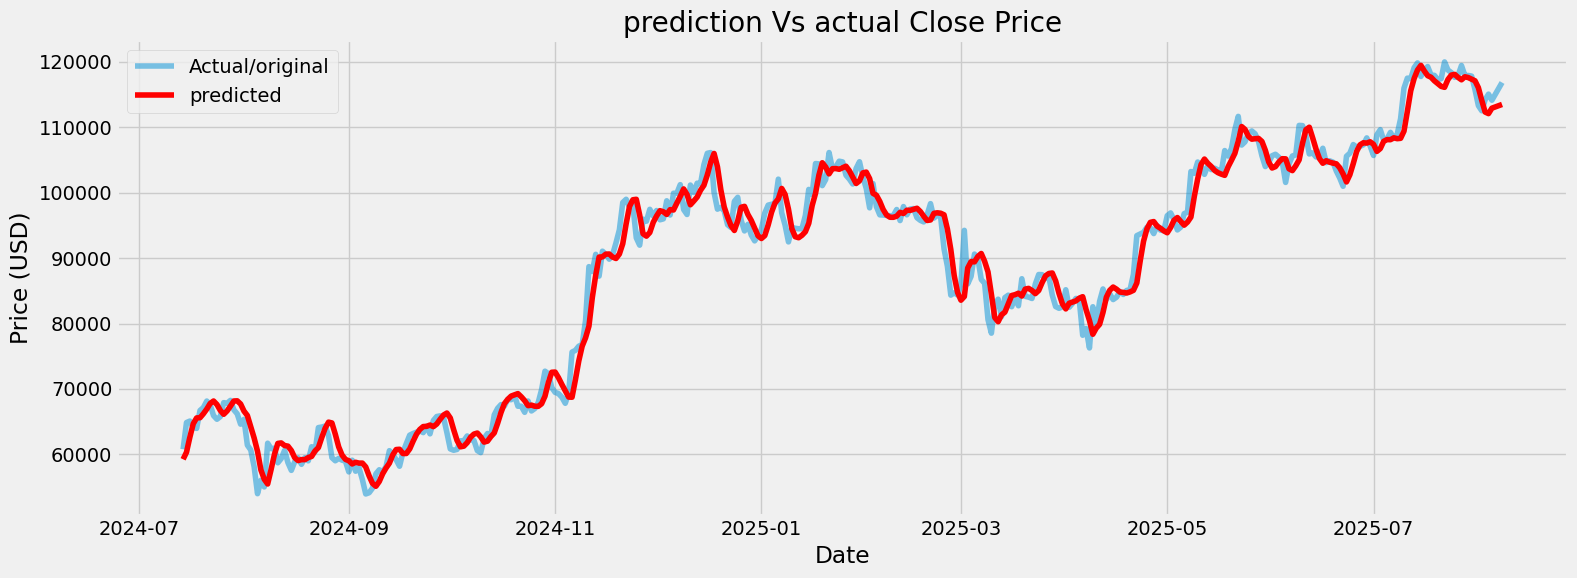

In [36]:
plotting_data= pd.DataFrame({
    'Prediction': inv_predictions.flatten(),
    'Actual': inv_y_test.flatten(),
},index= price_closing.index[train_size+base_days:]

)

plt.figure(figsize=(16, 6))
plt.plot(plotting_data.index, plotting_data['Actual'], label='Actual/original', alpha=0.5)
plt.plot(plotting_data.index, plotting_data['Prediction'], label='predicted', color='r')

plt.title('prediction Vs actual Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## prediction for feature days

In [37]:
# Step 1: Get last 90 days
last_sequence = scaled_data[-base_days:]
future_predictions = []

current_input = last_sequence.copy()

# Step 2: Predict 90 days into the future
for _ in range(90):
    prediction_input = current_input.reshape(1, base_days, 1)  # Reshape for LSTM
    next_pred = model.predict(prediction_input, verbose=0)     # Output shape: (1, 1)

    future_predictions.append(next_pred[0, 0])  # Store scalar

    # Corrected input update
    current_input = np.vstack([current_input[1:], next_pred])  # Maintain (90, 1)


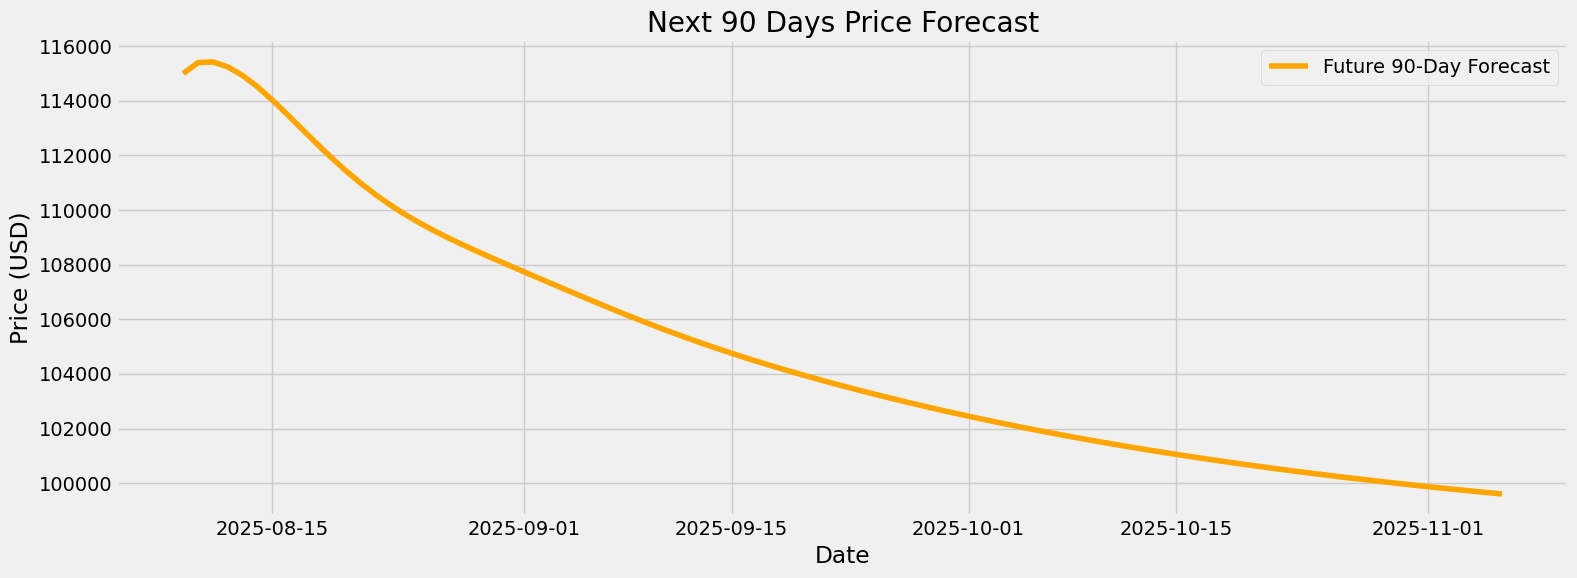

In [38]:
# Step 3: Inverse transform predictions
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_prices = scaler.inverse_transform(future_predictions)

# Step 4: Create future date range
last_date = price_closing.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

# Step 5: Plot
plt.figure(figsize=(16, 6))
plt.plot(future_dates, future_prices, label='Future 90-Day Forecast', color='orange')
plt.title('Next 90 Days Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


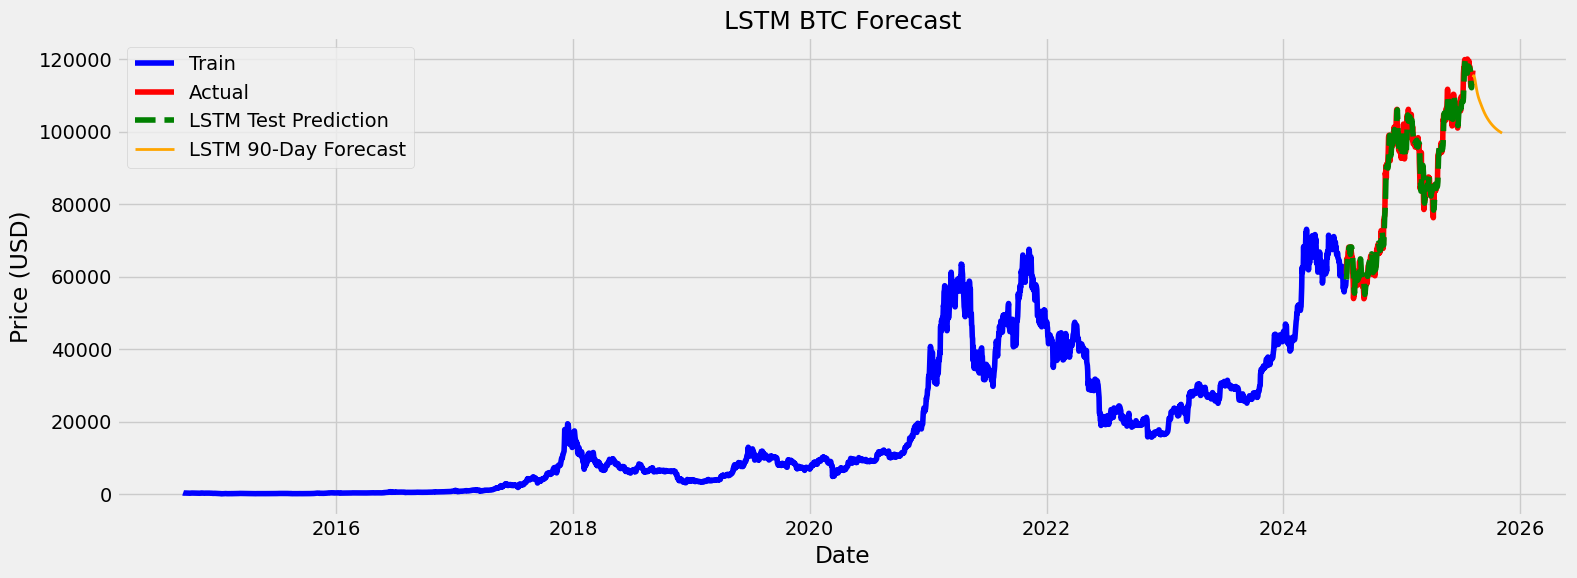

In [39]:
plt.figure(figsize=(16, 6))

# Plot training data
plt.plot(price_closing.index[:train_size+base_days], price_closing['Close'][:train_size+base_days], label='Train', color='blue')

# Plot actual test data
plt.plot(price_closing.index[train_size+base_days:], inv_y_test.flatten(), label='Actual', color='red')

# Plot predicted test values
plt.plot(price_closing.index[train_size+base_days:], inv_predictions.flatten(), label='LSTM Test Prediction', color='green', linestyle='--')

# Plot future 90-day predictions
plt.plot(future_dates, future_prices.flatten(), label='LSTM 90-Day Forecast', color='orange', linewidth=2)

# Formatting
plt.title('LSTM BTC Forecast', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Use these variables:
# inv_y_test: actual prices for test set
# inv_predictions: LSTM predicted prices for test set

# Compute metrics
mse = mean_squared_error(inv_y_test, inv_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(inv_y_test, inv_predictions)

print(f"LSTM Test Prediction - RMSE: {rmse:.2f}")
print(f"LSTM Test Prediction - MAE: {mae:.2f}")


LSTM Test Prediction - RMSE: 2522.85
LSTM Test Prediction - MAE: 1909.45


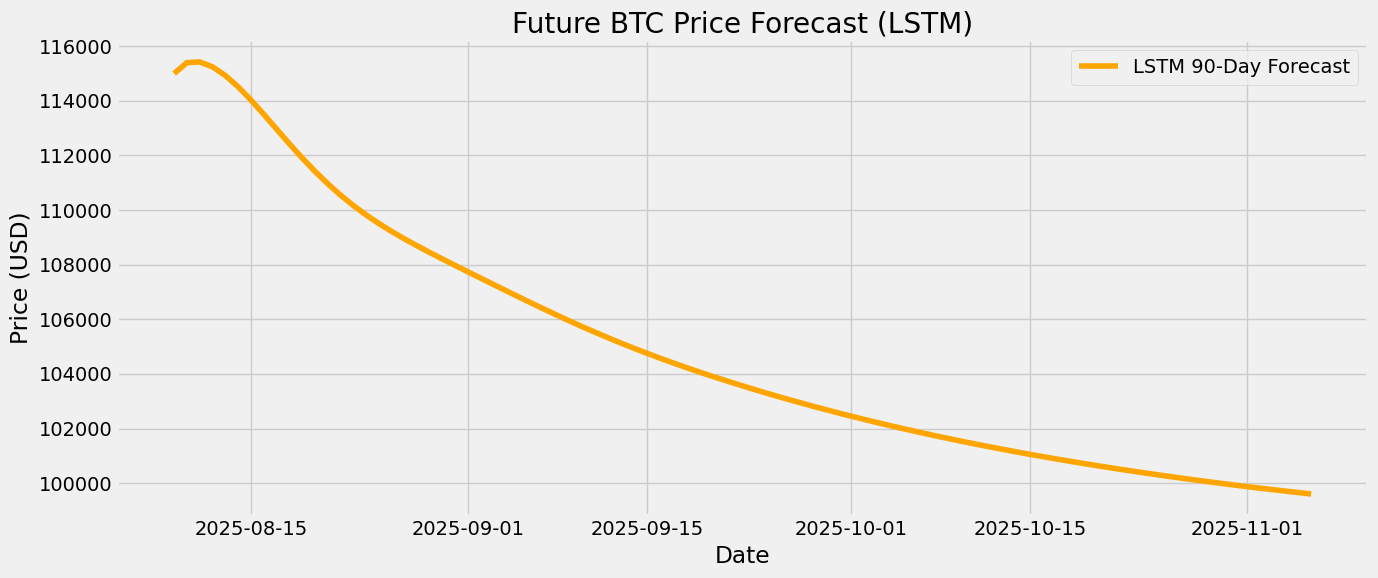

In [41]:
plt.figure(figsize=(14, 6))
plt.plot(future_dates, future_prices, label="LSTM 90-Day Forecast", color="orange")
plt.title("Future BTC Price Forecast (LSTM)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


need to improve over lstm model with parameters like dropout increasing epoches size 

C:\Users\weare\AppData\Local\Temp\ipykernel_8896\1466900300.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
c:\Users\weare\ansel\envs\crypto_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 90, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,163 (117.82 KB)

 Trainable params: 30,163 (117.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0066 - val_loss: 0.0016
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 8.2030e-04 - val_loss: 0.0016
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 7.3696e-04 - val_loss: 0.0016
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 6.8135e-04 - val_loss: 0.0012
Epoch 5/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 6.7622e-04 - val_loss: 0.0010
Epoch 6/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 5.7389e-04 - val_loss: 0.0010
Epoch 7/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 5.3680e-04 - val_loss: 0.0011
Epoch 8/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 5.1773e-04 - val_loss: 9.5439e-04
Epoch 9/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.7709e-04 - val_loss: 7.5355e-04
Epoch 10/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.9152e-04 - val_loss: 0.0013
Epoch 11/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 4.1689e-04 - val_loss: 6.9628e-04


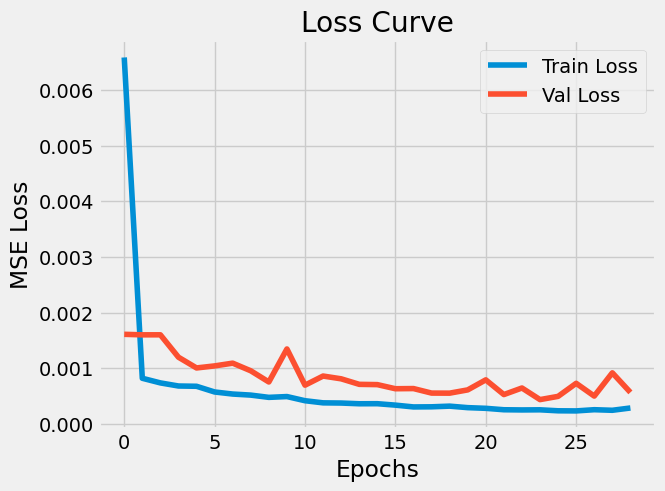

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
LSTM Test Prediction - RMSE: 2759.36
LSTM Test Prediction - MAE: 2115.46


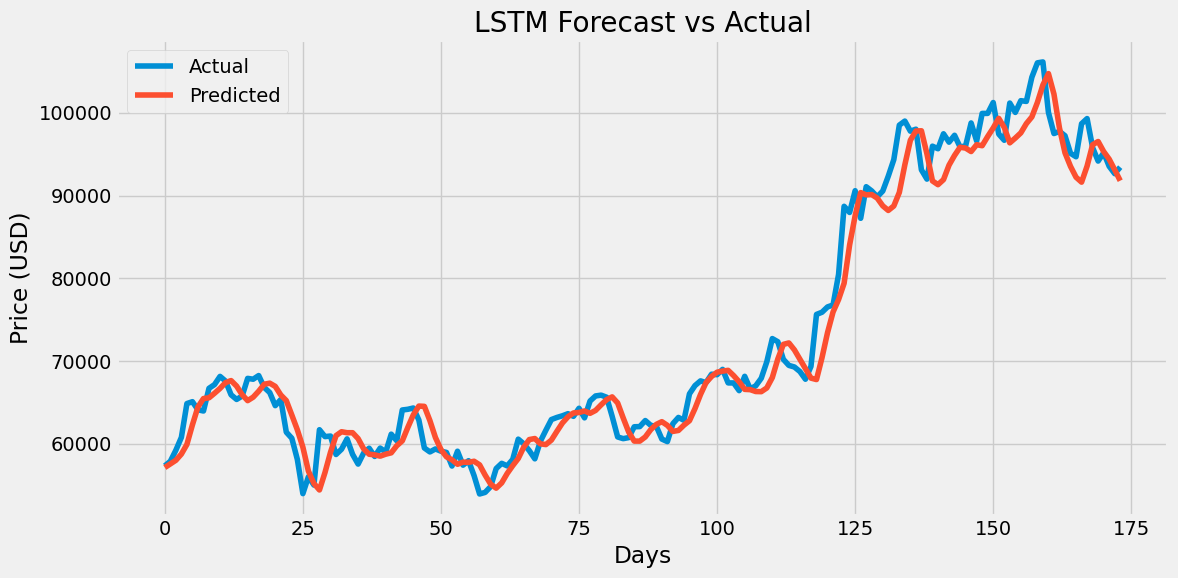

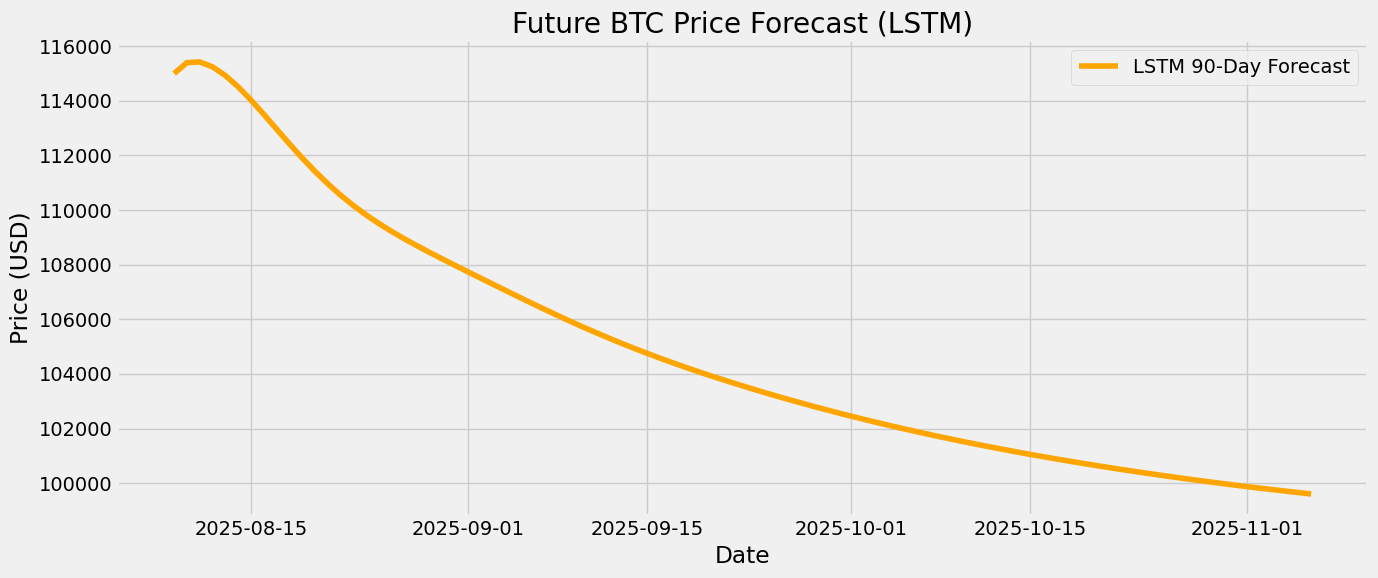

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import yfinance as yf

# --- Step 1: Load and Prepare Data ---
df = yf.download("BTC-USD", start="2020-01-01", end="2025-01-01")
df = df[['Close']]
df = df.dropna()

# --- Step 2: Scale Data ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# --- Step 3: Create Sequences ---
def create_sequences(data, window_size):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(x), np.array(y)

window_size = 90
x, y = create_sequences(scaled_data, window_size)

# --- Step 4: Train-Test Split ---
train_size = int(len(x) * 0.9)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- Step 5: Validation Split from Training Data ---
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42, shuffle=False
)

# --- Step 6: Build LSTM Model ---
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(32, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# --- Step 7: Train Model with EarlyStopping ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# --- Step 8: Plot Loss Curve ---
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# --- Step 9: Predict & Inverse Transform ---
predictions = model.predict(x_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# --- Step 10: Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

print(f"LSTM Test Prediction - RMSE: {rmse:.2f}")
print(f"LSTM Test Prediction - MAE: {mae:.2f}")

# --- Step 11: Plot Prediction vs Actual ---
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.title("LSTM Forecast vs Actual")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(future_dates, future_prices, label="LSTM 90-Day Forecast", color="orange")
plt.title("Future BTC Price Forecast (LSTM)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))



# 📌 Conclusion :

This project applied three time series forecasting models — ARIMA, Prophet, and LSTM — to predict Bitcoin (BTC) prices. Here's a summary of the results:
| Model   | RMSE      | MAE       |
| ------- | --------- | --------- |
| ARIMA   | 15,634    | 14,515    |
| Prophet | 11,062    | 10,075    |
| LSTM    | **2,535** | **1,896** |



✅ LSTM outperformed both traditional (ARIMA) and additive (Prophet) models, achieving the lowest error rates, making it most reliable for BTC price forecasting in highly volatile conditions.

📉 The LSTM 90-day forecast suggests a gradual decline in Bitcoin price from ~115,000 USD to just under 100,000 USD by early November 2025.

🔍 This trend may reflect market corrections or potential bearish signals, though further analysis is recommended before trading decisions.

### 🔮 Final Takeaway
Deep learning models like LSTM offer superior adaptability and accuracy in crypto price prediction tasks, especially when compared to classical time-series models.

# ⚠️ Cautions & Limitations
These models are trained on publicly available historical data from Yahoo Finance (yfinance), and do not incorporate insider, confidential, or real-time sentiment data.

## 📉 Predictions are probabilistic, not deterministic — actual market behavior may deviate significantly due to unexpected events, regulations, or macroeconomic changes.

## 📈 For real-world trading or financial applications, it is strongly advised to incorporate high-frequency data, on-chain analytics, volume and sentiment data, and risk management strategies.

## Disclaimer:
Forecasts may NOT match actual BTC prices. These models are based only on historical closing prices from publicly available sources.

❌ No guarantee of trend accuracy — predictions may show neutral, upward, or downward movement.

❌ The models do not account for real-time factors such as:

News articles

Global economic changes

Investor sentiment

Tweets or social media influence

Whale activity or volume manipulation

❌ Not suitable for live trading decisions. This is a research and academic project only.

✅ Consider integrating NLP models with sentiment analysis for more realistic market behavior in future work.

